# Soccer Data Analysis (European Soccer Database)

In [1]:
#importing the necessary libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

### Importing the Player's attributes table from the database

In [2]:
data = sqlite3.connect('database.sqlite')
df = pd.read_sql_query('SELECT * from Player_Attributes', data)

In [3]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


### Describing the basic statictics about the data

In [4]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [5]:
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

### Handling the missing values by dropping the NaN values from the rows

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum(), df.shape

(id                     0
 player_fifa_api_id     0
 player_api_id          0
 date                   0
 overall_rating         0
 potential              0
 preferred_foot         0
 attacking_work_rate    0
 defensive_work_rate    0
 crossing               0
 finishing              0
 heading_accuracy       0
 short_passing          0
 volleys                0
 dribbling              0
 curve                  0
 free_kick_accuracy     0
 long_passing           0
 ball_control           0
 acceleration           0
 sprint_speed           0
 agility                0
 reactions              0
 balance                0
 shot_power             0
 jumping                0
 stamina                0
 strength               0
 long_shots             0
 aggression             0
 interceptions          0
 positioning            0
 vision                 0
 penalties              0
 marking                0
 standing_tackle        0
 sliding_tackle         0
 gk_diving              0
 gk_handling

## Now, the data cleaning step is complete. I want to find the top features, that is highly correlated with overall-ratings. This features will give us insights about the factors that are considered for deciding the overall ratings of the Soccer Players

In [8]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [9]:
cols = ['potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

### Getting the correlation values of all the features with respect to overall-ratings

In [10]:
correlationValues = [df['overall_rating'].corr(df[f]) for f in cols]
print(correlationValues)

[0.7654346716757737, 0.35732018035431995, 0.33007854277118565, 0.31332410055165055, 0.4582426558154409, 0.3617394998725066, 0.3541906009384681, 0.3575657691094524, 0.34980031144238893, 0.43452499155719854, 0.44399076282629857, 0.24399848837129656, 0.2530480629025461, 0.23996282078849343, 0.7718560966627331, 0.16021077852080742, 0.42805313222194, 0.2589783181304958, 0.3256056577869243, 0.3156837624075799, 0.3926679728995561, 0.3227818681524765, 0.24909402566182132, 0.36897763914725196, 0.43149329504794065, 0.39271510791118847, 0.13218473835173344, 0.16398609375977696, 0.1280540129512117, 0.027674967162302392, 0.006717294838212118, 0.028799103884296007, 0.008029270276245391, 0.007803569907558588]


### It's confusing to go through this list, let's plot the values to understand it better

In [11]:
# Function to display the correlation values
def plot_dataframe(df, y_label):  
    fig = plt.gcf()
    fig.set_size_inches(20, 15)
    plt.ylabel(y_label)

    ax = df.correlation.plot(linewidth=3, color='blue')
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation=75);
    plt.grid(True)
    plt.show()

In [12]:
# create a dataframe using cols and correlations
df2 = pd.DataFrame({'attributes': cols, 'correlation': correlationValues}) 

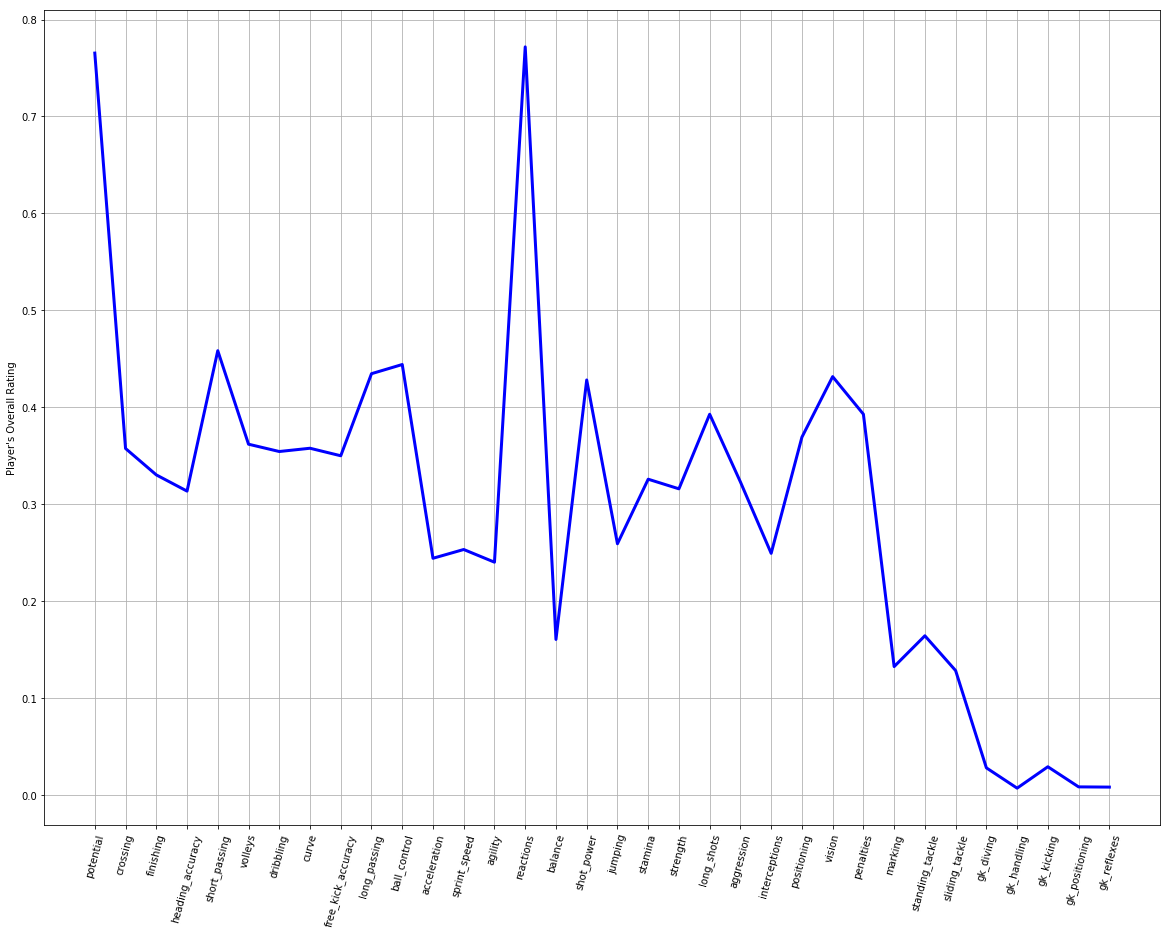

In [13]:
# let's plot above dataframe using the function we created
plot_dataframe(df2, 'Player\'s Overall Rating')

### Now, it's easy to understand those correlation values. I will extract top 5 highest values and based on those features, I will cluster the group of Players with similar attributes/features

In [14]:
selectedFeatures = ['potential','reactions','ball_control','short_passing','shot_power']

In [15]:
# New Dataframe for these features

df_selected = df[selectedFeatures].copy(deep=True)

In [16]:
df_selected.head()

,potential,reactions,ball_control,short_passing,shot_power
0,71.0,47.0,49.0,61.0,55.0
1,71.0,47.0,49.0,61.0,55.0
2,66.0,47.0,49.0,61.0,55.0
3,65.0,46.0,48.0,60.0,54.0
4,65.0,46.0,48.0,60.0,54.0


### Clustering the players with different attributes/abilities

In [17]:
kmeans = KMeans(n_clusters=4,random_state=0).fit(df_selected)

In [18]:
kmeans.labels_   #Displaying the labels(cluster group) associated with each sample.

array([2, 2, 2, ..., 3, 3, 3], dtype=int32)

<p style="color:blue;font-size:2em;font-family:'impact'"> Visulizing the clusters </p>

### Visulization of Clusters [with respect to potential (x-axis) and all other attributes (y-label)]

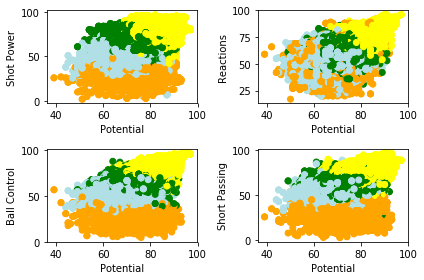

In [26]:
color_theme = np.array(['green','orange','powderblue','yellow'])
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax1.set_xlabel('Potential')
ax1.set_ylabel('Shot Power')
ax1.scatter(x=df_selected['potential'],y=df_selected['shot_power'],c=color_theme[kmeans.labels_])

ax2 = fig.add_subplot(222)
ax2.set_xlabel('Potential')
ax2.set_ylabel('Reactions')
ax2.scatter(x=df_selected['potential'],y=df_selected['reactions'],c=color_theme[kmeans.labels_])

ax3 = fig.add_subplot(223)
ax3.set_xlabel('Potential')
ax3.set_ylabel('Ball Control')
ax3.scatter(x=df_selected['potential'],y=df_selected['ball_control'],c=color_theme[kmeans.labels_])

ax4 = fig.add_subplot(224)
ax4.set_xlabel('Potential')
ax4.set_ylabel('Short Passing')
ax4.scatter(x=df_selected['potential'],y=df_selected['short_passing'],c=color_theme[kmeans.labels_])

plt.tight_layout()
plt.show()

### Visulization of Clusters [with respect to reactions (x-axis) and all other attributes (y-label)]

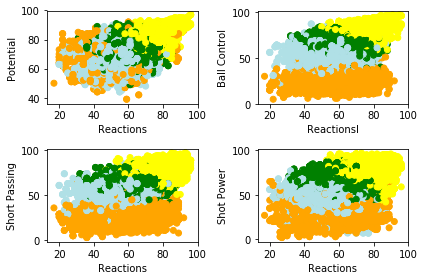

In [27]:
color_theme = np.array(['green','orange','powderblue','yellow'])
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax1.set_xlabel('Reactions')
ax1.set_ylabel('Potential')
ax1.scatter(x=df_selected['reactions'],y=df_selected['potential'],c=color_theme[kmeans.labels_])

ax2 = fig.add_subplot(222)
ax2.set_xlabel('Reactionsl')
ax2.set_ylabel('Ball Control')
ax2.scatter(x=df_selected['reactions'],y=df_selected['ball_control'],c=color_theme[kmeans.labels_])

ax3 = fig.add_subplot(223)
ax3.set_xlabel('Reactions')
ax3.set_ylabel('Short Passing')
ax3.scatter(x=df_selected['reactions'],y=df_selected['short_passing'],c=color_theme[kmeans.labels_])

ax4 = fig.add_subplot(224)
ax4.set_xlabel('Reactions')
ax4.set_ylabel('Shot Power')
ax4.scatter(x=df_selected['reactions'],y=df_selected['shot_power'],c=color_theme[kmeans.labels_])

plt.tight_layout()
plt.show()

### Visulization of Clusters [with respect to Ball Control (x-axis) and all other attributes (y-label)]

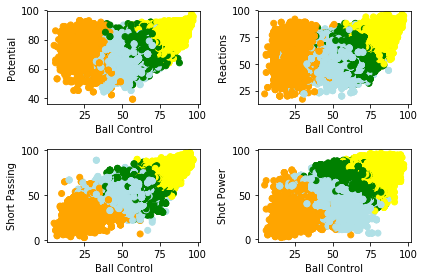

In [28]:
color_theme = np.array(['green','orange','powderblue','yellow'])
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax1.set_xlabel('Ball Control')
ax1.set_ylabel('Potential')
ax1.scatter(x=df_selected['ball_control'],y=df_selected['potential'],c=color_theme[kmeans.labels_])

ax2 = fig.add_subplot(222)
ax2.set_xlabel('Ball Control')
ax2.set_ylabel('Reactions')
ax2.scatter(x=df_selected['ball_control'],y=df_selected['reactions'],c=color_theme[kmeans.labels_])

ax3 = fig.add_subplot(223)
ax3.set_xlabel('Ball Control')
ax3.set_ylabel('Short Passing')
ax3.scatter(x=df_selected['ball_control'],y=df_selected['short_passing'],c=color_theme[kmeans.labels_])

ax4 = fig.add_subplot(224)
ax4.set_xlabel('Ball Control')
ax4.set_ylabel('Shot Power')
ax4.scatter(x=df_selected['ball_control'],y=df_selected['shot_power'],c=color_theme[kmeans.labels_])

plt.tight_layout()
plt.show()

### Visulization of Clusters [with respect to Short Passing (x-axis) and all other attributes (y-label)]

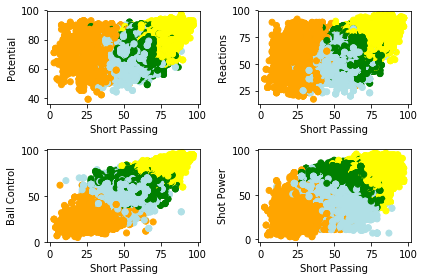

In [29]:
color_theme = np.array(['green','orange','powderblue','yellow'])
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax1.set_xlabel('Short Passing')
ax1.set_ylabel('Potential')
ax1.scatter(x=df_selected['short_passing'],y=df_selected['potential'],c=color_theme[kmeans.labels_])

ax2 = fig.add_subplot(222)
ax2.set_xlabel('Short Passing')
ax2.set_ylabel('Reactions')
ax2.scatter(x=df_selected['short_passing'],y=df_selected['reactions'],c=color_theme[kmeans.labels_])

ax3 = fig.add_subplot(223)
ax3.set_xlabel('Short Passing')
ax3.set_ylabel('Ball Control')
ax3.scatter(x=df_selected['short_passing'],y=df_selected['ball_control'],c=color_theme[kmeans.labels_])

ax4 = fig.add_subplot(224)
ax4.set_xlabel('Short Passing')
ax4.set_ylabel('Shot Power')
ax4.scatter(x=df_selected['short_passing'],y=df_selected['shot_power'],c=color_theme[kmeans.labels_])

plt.tight_layout()
plt.show()

### Visulization of Clusters [with respect to Shot Power (x-axis) and all other attributes (y-label)]

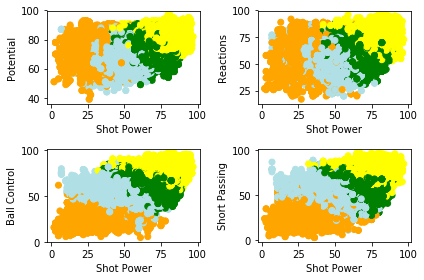

In [30]:
color_theme = np.array(['green','orange','powderblue','yellow'])
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax1.set_xlabel('Shot Power')
ax1.set_ylabel('Potential')
ax1.scatter(x=df_selected['shot_power'],y=df_selected['potential'],c=color_theme[kmeans.labels_])

ax2 = fig.add_subplot(222)
ax2.set_xlabel('Shot Power')
ax2.set_ylabel('Reactions')
ax2.scatter(x=df_selected['shot_power'],y=df_selected['reactions'],c=color_theme[kmeans.labels_])

ax3 = fig.add_subplot(223)
ax3.set_xlabel('Shot Power')
ax3.set_ylabel('Ball Control')
ax3.scatter(x=df_selected['shot_power'],y=df_selected['ball_control'],c=color_theme[kmeans.labels_])

ax4 = fig.add_subplot(224)
ax4.set_xlabel('Shot Power')
ax4.set_ylabel('Short Passing')
ax4.scatter(x=df_selected['shot_power'],y=df_selected['short_passing'],c=color_theme[kmeans.labels_])

plt.tight_layout()
plt.show()

### From these visulization (with respect to every other variables) , we can infered a very valuble insights about the different players in the specific groups/clusters. From this insights, coach/manager can take actions or decision about the key areas, players need to focus more, to increase the overall ratings/abilities of the players